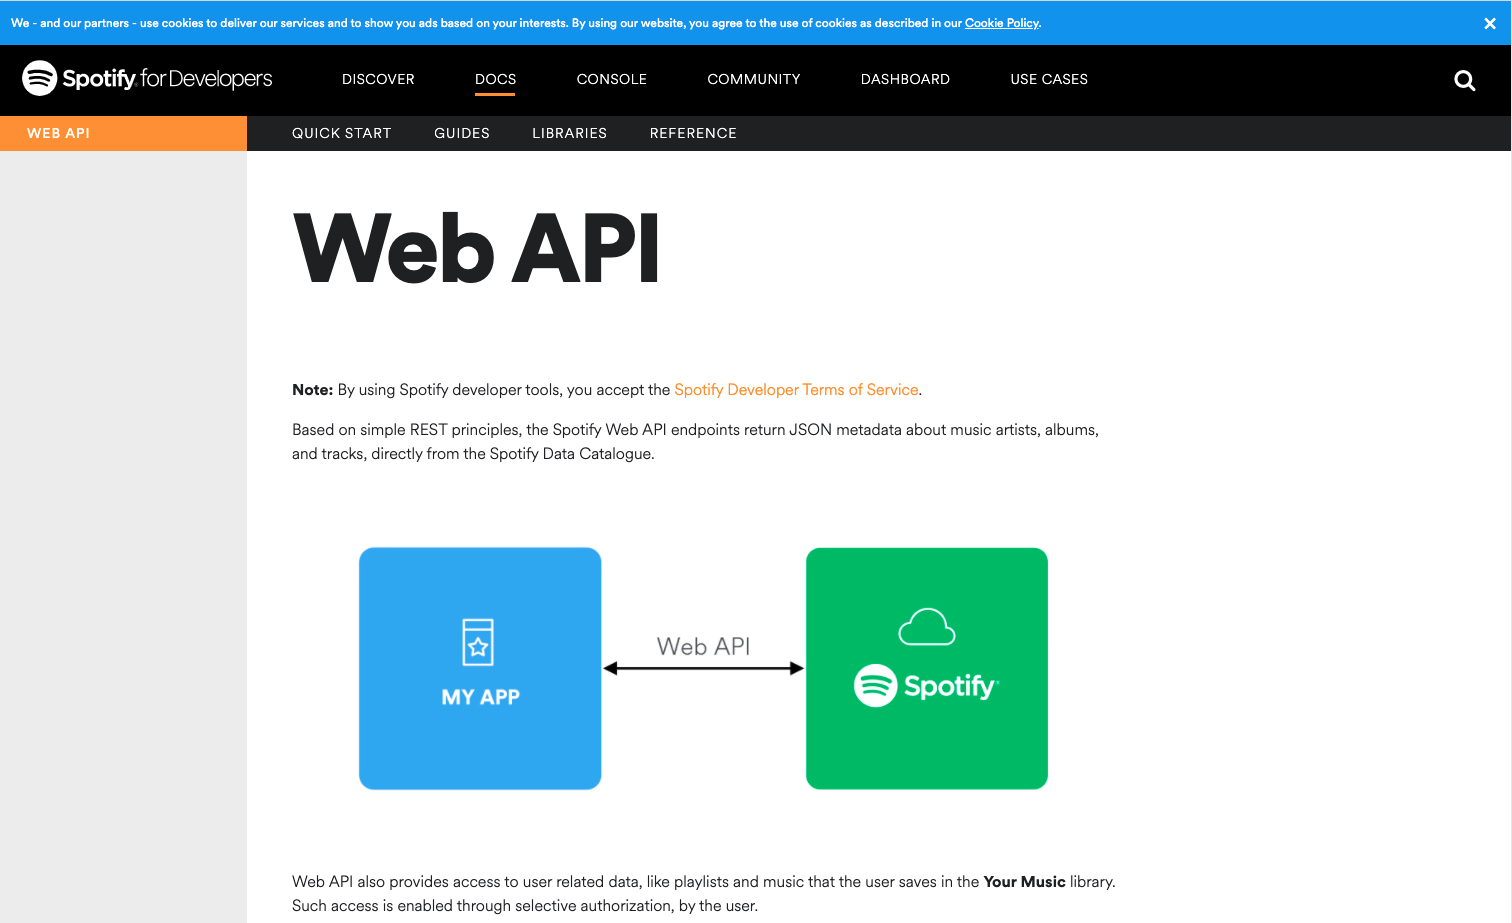

In [85]:
from IPython.display import Image
from IPython.core.display import HTML

Image("images/Screenshot_API_spotify.png")

## API Wrapper

- create a list and assign it to a variable named `my_20_artists`.
- explore the production of a band
- find values of features for their songs
- safe the data frame to be used in the kmean, phase2 of the recommender.

https://www.notion.so/Berlin-data-classroom-5f8f3ff27075492b8b457677368fda2d?p=28b25b8f0466486ebbecc7380c15b7d0

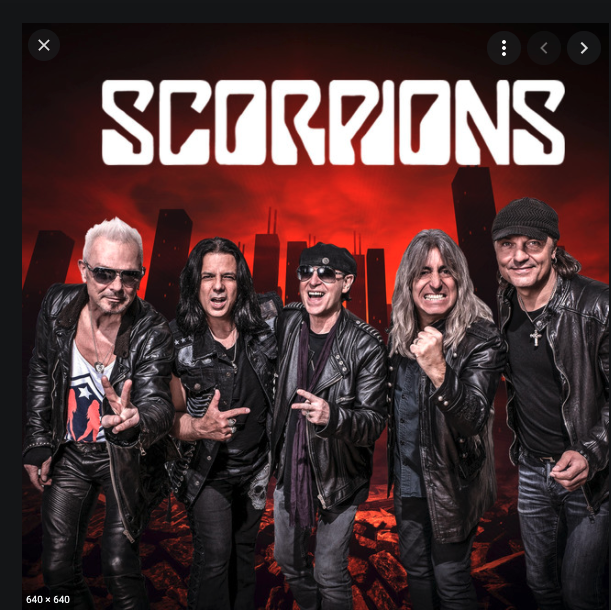

In [86]:
Image("images/Screenshot_scorpions.png")

In [87]:
'''import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id="your client id goes here",
                                                          client_secret="your client secret goes here"))'''

'import spotipy\nfrom spotipy.oauth2 import SpotifyClientCredentials\nsp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id="your client id goes here",\n                                                          client_secret="your client secret goes here"))'

In [88]:
# import the libraries
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import getpass
import pandas as pd

**I had problems with getpass!!!**

In [89]:
client_id='5c1883b103534b7bb0057960a379e142'
client_secret='4a64702efea6483e9c05ed48d17cf48c'

In [90]:
# hide the passwords
# client_id=getpass.getpass('client-id?')
# client_secret=getpass.getpass('client-secret?')

In [91]:
# getpass doesn't work during the work, I activate it in the end.

In [92]:
# create and store a connection to the api
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=client_id,
                                                          client_secret=client_secret))

sp

In [93]:
# from our list of artists, extract the top 50 sogns in spotify and extract ids and audio features

artists =['Madonna', 
          'Queen', 
          'George Michael', 
          'Ivete Sangalo', 
          'Lady Gaga', 
          'Scorpions', 
          'Lulu Santos', 
          'Adele',
          'Marisa Monte',
          'Emilie Sande', 
          'Evanescence',
          'Pink Floyd', 
          'Beattles',
          "Guns n'Roses",
          'Roxette',
          'Aerosmith',
          'U2',
          'Eagles',
          'Marron5',
          'Cold Play'
]

# loop the artist search and check the type
my_20_artists = [sp.search(q= artist , limit = 50) for artist in artists]
type(my_20_artists)


# from lecture sp.search(q="Lady Gaga", limit=50)

# create the dictionary
def artist_to_dict(artists):
   return{artist:sp.search(q= artist, limit=50) for artist in artists}
artist_to_dict(artists)
len(artist_to_dict(artists))

20

In [94]:
# get artist name and ids of the artists
my_20_artists[5]['tracks'].keys() #each track on spotify is a dictionary with the following keys


dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [95]:
my_20_artists[5]['tracks']['total'] # total reproduction

1798

In [96]:
# track Scorpions (Object Index: id, uri,...)
my_20_artists[5]['tracks']['items'][0] 

{'album': {'album_type': 'album',
  'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/27T030eWyCQRmDyuvr1kxY'},
    'href': 'https://api.spotify.com/v1/artists/27T030eWyCQRmDyuvr1kxY',
    'id': '27T030eWyCQRmDyuvr1kxY',
    'name': 'Scorpions',
    'type': 'artist',
    'uri': 'spotify:artist:27T030eWyCQRmDyuvr1kxY'}],
  'available_markets': ['AR',
   'BO',
   'BR',
   'BZ',
   'CA',
   'CL',
   'CO',
   'CR',
   'EC',
   'GT',
   'GY',
   'HN',
   'MX',
   'NI',
   'PA',
   'PE',
   'PY',
   'SR',
   'SV',
   'US',
   'UY'],
  'external_urls': {'spotify': 'https://open.spotify.com/album/71cfSO0iO1fjgQLEb3Wc6C'},
  'href': 'https://api.spotify.com/v1/albums/71cfSO0iO1fjgQLEb3Wc6C',
  'id': '71cfSO0iO1fjgQLEb3Wc6C',
  'images': [{'height': 640,
    'url': 'https://i.scdn.co/image/ab67616d0000b273926764eed4da16a86b9ce33e',
    'width': 640},
   {'height': 300,
    'url': 'https://i.scdn.co/image/ab67616d00001e02926764eed4da16a86b9ce33e',
    'width': 300},
   {'

In [97]:
# song title
my_20_artists[5]['tracks']['items'][0]['name']

'Rock You Like A Hurricane'

In [98]:
# check the keys
my_20_artists[5]['tracks']['items'][0].keys()

dict_keys(['album', 'artists', 'available_markets', 'disc_number', 'duration_ms', 'explicit', 'external_ids', 'external_urls', 'href', 'id', 'is_local', 'name', 'popularity', 'preview_url', 'track_number', 'type', 'uri'])

In [99]:
# check details of the artist
my_20_artists[5]['tracks']['items'][0]['artists']

[{'external_urls': {'spotify': 'https://open.spotify.com/artist/27T030eWyCQRmDyuvr1kxY'},
  'href': 'https://api.spotify.com/v1/artists/27T030eWyCQRmDyuvr1kxY',
  'id': '27T030eWyCQRmDyuvr1kxY',
  'name': 'Scorpions',
  'type': 'artist',
  'uri': 'spotify:artist:27T030eWyCQRmDyuvr1kxY'}]

In [100]:
# iterate to get all items for each artist
#total items 
all_items = [my_20_artists[i]['tracks']['items'] for i in  range(len(my_20_artists))]

In [101]:
# double indexing for artist and songs
# first artist, first song - Id
all_items[0][0]['id']

'4v7SAP4KD96BFLWiCd1vF0'

In [102]:
all_ids = [all_items[0][0]['id'] for track in range(0,50) for artist in range(len(my_20_artists))]
all_ids =len(all_ids)

In [103]:
## solution Kosta FAILED
# [all_items[track][artist]['id'] for track in range(0, len(all_items)) for artist in range(len(all_items[track]))]

In [104]:
all_ids

1000

In [107]:
#get the audio features
sp.audio_features(all_ids[:10])

TypeError: 'int' object is not subscriptable

In [106]:
# chunking the all_ids to overcome the limit of 50 songs of spotipy. Yield successive n-sized chunks from lst.
def divide_chunks(lst, n):
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

        
audio_feats = []
for chunk in list(divide_chunks(all_ids, 50)):
        audio_feats.append(sp.audio_features(chunk))
        

TypeError: object of type 'int' has no len()

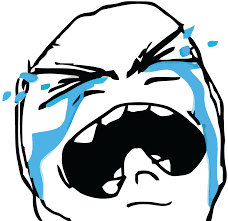

In [117]:
Image("images/crying_meme.png")

In [118]:
type(audio_feats)

list

In [119]:
audio_feats

[]

In [120]:
# turn audio_feats into multiple dictionaries
for feature in audio_feats:
    for i in feature:
        print(i)

In [121]:
i.keys()

dict_keys(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature'])

In [122]:
chunk_list = [song for artist in audio_feats for song in artist]

# to not use 'song is not none'

In [123]:
df = pd.DataFrame(chunk_list)
df

""


In [124]:
 df.isna().sum()  #  check if we have null values

Series([], dtype: float64)

In [125]:
# save the dataframe in a csv file
df.to_csv('data/3_Spotipy_lab_B.csv', index=False)

**To improve:** 
- review all code
- fix errors

References:
- https://developer.spotify.com/documentation/web-api/reference/#endpoint-get-several-tracks
- https://medium.com/@maxtingle/getting-started-with-spotifys-api-spotipy-197c3dc6353b
- yield: https://stackoverflow.com/questions/231767/what-does-the-yield-keyword-do
- chunks: https://www.geeksforgeeks.org/break-list-chunks-size-n-python/
- lab: https://github.com/Tognolia/GNOD-music-demonstrators/blob/main/data_web_scarping_project/3_Spotipy_lab.ipynb
- https://nycdatascience.com/blog/student-works/web-scraping/spotify-x-billboard/